# Arrays

In [174]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.3

In [175]:
import ch.unibas.informatik.jturtle.Turtle;

Ideen 

* Zeigen von initialisieren
* Referenzen. Wenn Element geändert wird, dann ändert sich auchanderes
    * Kopieren
* Lineares Suchen und Binäre suchen

* Mehrdimensionale Arrays
    * Matrixmultiplikation
    
* Farbpallette mit Turtle

# Initialisierung von Arrays

In [2]:
static void printArray(int[] a) { 
    int i = 0;
    for (; i < a.length - 1; i++) {
        System.out.print(a[i]);
        System.out.print(", ");
    }
    System.out.print(a[i]);
    System.out.println("");
}

In [3]:
int[] a = {1, 2, 3, 4, 5};
int[] b = a;

In [4]:
b[0] = 3

3

In [5]:
printArray(a);
printArray(b);

3, 2, 3, 4, 5
3, 2, 3, 4, 5


In [6]:
int[] a = {1, 2, 3, 4, 5};
int[] b = a.clone();
b[0] = 3;

3

In [7]:
printArray(a);
printArray(b);

1, 2, 3, 4, 5
3, 2, 3, 4, 5


## Suchen in Arrays

In [8]:

// gibt Position oder -1 aus wenn nicht gefunden. 

static int findNaive(int[] haystack, int needle) {
    int pos = haystack.length - 1;
    while (pos > 0 && haystack[pos] != needle) {
        pos = pos - 1;
    }
    return pos;
}

In [9]:
findNaive(b, 3)

2

In [68]:
static int binarySearch(int[] haystack, int needle) {
    // requirement: elements in haystack must be sorted
    int low = 0;
    int hi = haystack.length -1 ;
    
    while (hi >= low) {
        int mid = low + (hi - low) / 2;
        if (needle > haystack[mid]) {
            low = mid + 1;
        } else if(needle < haystack[mid]) {
            hi = mid - 1;
        } else {
            return mid;
        }
    }
            
    return -1;
}

In [81]:
static int binarySearchRecursive(int[] haystack, int needle, int low, int hi) {
    if (hi >= low) {
        return -1;
    }
    
    int mid = low + (hi - low) / 2;
    
    if (needle == haystack[mid]) {
        return mid;
    }
    else if (needle > haystack[mid]) {
         return binarySearchRecursive(haystack, needle, mid + 1, hi);
    } else{
            return binarySearchRecursive(haystack, needle, low, mid - 1);
    }
}

In [82]:
binarySearchRecursive(b, 8, 0, b.length -1)

-1


## Mehrdimensionale Arrays

In [84]:
static void print2DArray(int[][] a) {
   for (int i = 0; i < twoDArray.length; i++) {
    for (int j = 0; j < twoDArray[i].length; j++) {
        twoDArray[i][j] = i * j;
    }
}
}

In [94]:
int[][] twoDArray = new int[10][10];

for (int i = 0; i < twoDArray.length; i++) {
    for (int j = 0; j < twoDArray[i].length; j++) {
        twoDArray[i][j] = i * j;
    }
}

In [95]:
print2DArray(twoDArray);

0 0 0 0 0 0 0 0 0 0 
0 1 2 3 4 5 6 7 8 9 
0 2 4 6 8 10 12 14 16 18 
0 3 6 9 12 15 18 21 24 27 
0 4 8 12 16 20 24 28 32 36 
0 5 10 15 20 25 30 35 40 45 
0 6 12 18 24 30 36 42 48 54 
0 7 14 21 28 35 42 49 56 63 
0 8 16 24 32 40 48 56 64 72 
0 9 18 27 36 45 54 63 72 81 


In [156]:
static void printAsciiArt(boolean[][] image) { 
  for (int i = 0; i < image.length; i++) {
    for (int j = 0; j < image[i].length; j++) {
        if (image[i][j]) {
            System.out.print("o ");
        } else {
            System.out.print(". ");
        }        
    }
    System.out.println("");
    }
}  


In [171]:
boolean[][] twoDArray = new boolean[50][50];

for (int i = 0; i < twoDArray.length; i++) {
    double x = (i - twoDArray.length / 2.0) / 15.0;
    for (int j = 0; j < twoDArray[i].length; j++) {
        double y = (j - twoDArray[i].length / 2.0) / 15.0 ;
        boolean res = (x * x + y * y - 1) * (x * x + y * y - 1) * (x * x + y * y - 1) - (x * x * y * y * y) <= 0;
           if (res ) {
               twoDArray[i][j] = true;
           } else {
               twoDArray[i][j] = false;
           }
    }
}

In [176]:
printAsciiArt(twoDArray);

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . o o o . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . o o o o o o o o o o o . . . . . . .

## Turtle Grafik mit Farben

In [228]:
java.awt.Color[] colorPalette1 = {
    java.awt.Color.BLACK, 
    java.awt.Color.DARK_GRAY, 
    java.awt.Color.GRAY,
    java.awt.Color.LIGHT_GRAY
};

java.awt.Color[] colorPalette2 = {
    java.awt.Color.MAGENTA,
    java.awt.Color.RED, 
    java.awt.Color.ORANGE, 
    java.awt.Color.YELLOW
};

In [229]:
static void coloredPattern(java.awt.Color[] colors) {
    Turtle turtle = new Turtle();
    turtle.penDown();
    turtle.penSize(5);
    for (int i = 0; i < 1000; i++) {
        turtle.penColor(colors[i % colors.length]);
        turtle.forward(i / 10);
        turtle.turnRight(98);
    }
    display(turtle.toImage());
}

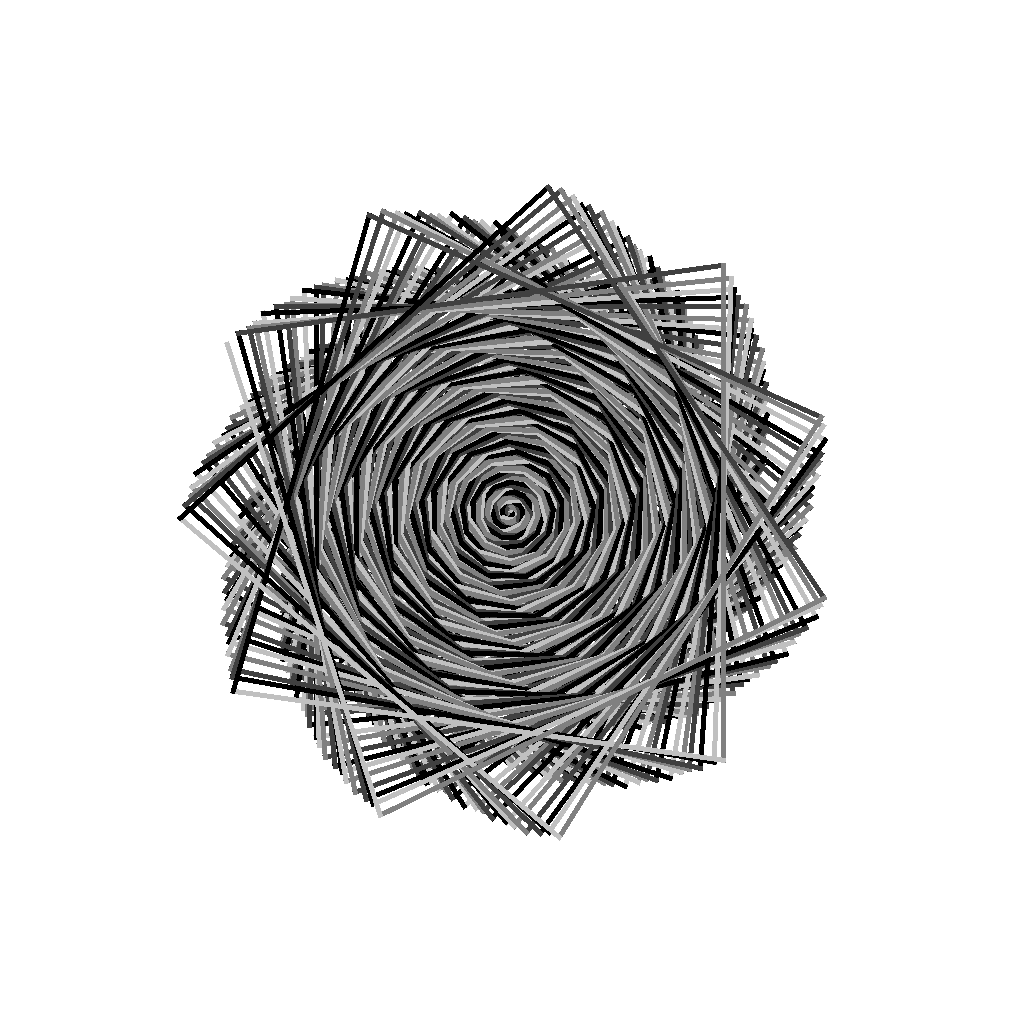

In [231]:
coloredPattern(colorPalette1);